In [1]:
#STEP-1 Import libraries 
import numpy as np
import numpy as np
import pandas as pd 
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import load_breast_cancer
from numpy import int64
from sklearn import svm
from sklearn.svm import SVC 
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
from pyhive import hive
#from impala.dbapi import connect
from hdfs import InsecureClient
from pyhive import hive
import pandas as pd
from scipy import stats
from sklearn.utils import resample
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing
from pandas.plotting import scatter_matrix
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import pandas as pd
from pyspark.sql import SparkSession
from pyspark import SparkContext
import pyspark.sql 
sc =SparkContext.getOrCreate()
sqlContext = SQLContext(sc)


/home/smicro/.local/lib/python3.6/site-packages/pyspark/context.py:238: FutureWarning: Python 3.6 support is deprecated in Spark 3.2.
  FutureWarning
/home/smicro/.local/lib/python3.6/site-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
#STEP-2 Read data from HIVE
from pyspark.sql import HiveContext
from pyspark import SparkConf
spark = SparkSession(sc)
hive_context = HiveContext(sc)
sqlContext = SQLContext(sc)
#bank1 = sqlContext.table("sda_hdd_db.sda_hdd_all")
dataset = sqlContext.sql("SELECT * FROM sda_hdd_db.ml_smart_data_view")

In [4]:
# convert catogorical colum as dable 
for col in dataset.columns:
    dataset = dataset.withColumn(col,dataset[col].cast('double'))

In [11]:
#STEP-4 select columns based on 1. less missing value 2. VIF 4. Correlation
# 5. Outliers, skewness, kurtosis 6.EDA 7.Descriptive analysis ect... 
# columns_to_drop = ["smart_201_normalized","smart_17_raw","smart_245_raw","smart_201_raw","smart_218_raw","smart_16_raw","smart_170_raw","smart_180_normalized","smart_180_raw","model","serial_number","process_date","date","smart_226_raw","smart_8_normalized","smart_254_normalized","smart_12_raw","smart_192_raw","smart_196_normalized","smart_222_normalized","smart_175_raw","smart_190_normalized","smart_13_raw","smart_177_normalized","smart_190_raw","smart_202_raw","smart_255_raw", "smart_15_normalized", "smart_234_raw", "smart_255_normalized", "smart_15_raw", "smart_234_normalized", "smart_206_normalized", "smart_206_raw", "smart_248_raw", "smart_248_normalized","smart_210_raw", "smart_224_raw", "smart_18_raw", "smart_23_raw", "smart_24_raw", "smart_179_raw", "smart_181_raw", "smart_182_raw", "smart_251_normalized", "smart_250_normalized", "smart_254_raw"]

input_cols = dataset.select("capacity_bytes",
"failure",
"smart_1_normalized",
"smart_1_raw",
"smart_2_normalized",
"smart_2_raw",
"smart_3_normalized",
"smart_3_raw",
"smart_4_normalized",
"smart_4_raw",
"smart_5_normalized",
"smart_5_raw",
"smart_7_normalized",
"smart_7_raw",
"smart_8_raw",
"smart_9_normalized",
"smart_9_raw",
"smart_10_normalized",
"smart_10_raw",
"smart_11_normalized",
"smart_11_raw",
"smart_12_normalized",
"smart_13_normalized",
"smart_16_normalized",
"smart_17_normalized",
"smart_18_normalized",
"smart_22_normalized",
"smart_22_raw",
"smart_23_normalized",
"smart_24_normalized",
"smart_168_normalized",
"smart_168_raw",
"smart_170_normalized",
"smart_173_normalized",
"smart_173_raw",
"smart_174_normalized",
"smart_174_raw",
"smart_175_normalized",
"smart_177_raw",
"smart_179_normalized",
"smart_181_normalized",
"smart_182_normalized",
"smart_183_normalized",
"smart_183_raw",
"smart_184_normalized",
"smart_184_raw",
"smart_187_normalized",
"smart_187_raw",
"smart_188_normalized",
"smart_188_raw",
"smart_189_normalized",
"smart_189_raw",
"smart_191_normalized",
"smart_191_raw",
"smart_192_normalized",
"smart_193_normalized",
"smart_193_raw",
"smart_194_normalized",
"smart_194_raw",
"smart_195_normalized",
"smart_195_raw",
"smart_196_raw",
"smart_197_normalized",
"smart_197_raw",
"smart_198_normalized",
"smart_198_raw",
"smart_199_normalized",
"smart_199_raw",
"smart_200_normalized",
"smart_200_raw",
"smart_202_normalized",
"smart_210_normalized",
"smart_218_normalized",
"smart_220_normalized",
"smart_220_raw",
"smart_222_raw",
"smart_223_normalized",
"smart_223_raw",
"smart_224_normalized",
"smart_225_normalized",
"smart_225_raw",
"smart_226_normalized",
"smart_231_normalized",
"smart_231_raw",
"smart_232_normalized",
"smart_232_raw",
"smart_233_normalized",
"smart_233_raw",
"smart_235_normalized",
"smart_235_raw",
"smart_240_normalized",
"smart_240_raw",
"smart_241_normalized",
"smart_241_raw",
"smart_242_normalized",
"smart_242_raw",
"smart_245_normalized",
"smart_247_normalized",
"smart_247_raw",
"smart_250_raw",
"smart_251_raw",
"smart_252_normalized",
"smart_252_raw",
"smart_160_normalized",
"smart_160_raw",
"smart_161_normalized",
"smart_161_raw",
"smart_163_normalized",
"smart_163_raw",
"smart_164_normalized",
"smart_164_raw",
"smart_165_normalized",
"smart_165_raw",
"smart_166_normalized",
"smart_166_raw",
"smart_167_normalized",
"smart_167_raw",
"smart_169_normalized",
"smart_169_raw",
"smart_176_normalized",
"smart_176_raw",
"smart_178_normalized",
"smart_178_raw")
cols = df.columns
#df.printSchema()

In [12]:
# impute the null value with mean
imputed_col = ['f_{}'.format(i+1) for i in range(len(input_cols))]
model = Imputer(strategy='mean',missingValue=None,inputCols=input_cols,outputCols=imputed_col).fit(dataset)
impute_data = model.transform(dataset)

TypeError: object of type 'DataFrame' has no len()

In [4]:
# count missing 
dataset=df
import pyspark.sql.functions as F
def count_missings(spark_df,sort=True):
    """
    Counts number of nulls and nans in each column
    """
    dataset = spark_df.select([F.count(F.when(F.isnan(c) | F.isnull(c), c)).alias(c) for (c,c_type) in spark_df.dtypes if c_type not in ('timestamp', 'string', 'date')]).toPandas()

    if len(dataset) == 0:
        print("There are no any missing values!")
        return None

    if sort:
        return dataset.rename(index={0: 'count'}).T.sort_values("count",ascending=False)

    return dataset
missings=count_missings(dataset)
# download missing 
#missings
import numpy as np
import pandas as pd
from openpyxl import Workbook
writer = pd.ExcelWriter("missings_info_pyspark.xlsx")
missings.to_excel(excel_writer=writer, sheet_name='Sheet1', na_rep="")
writer.save()


In [12]:
#STEP-3 fill missing with zero 
df=df.na.fill(value=0)

In [13]:
!pip install hist

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 5.5 MB 15.0 MB/s            


(array([   990.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,  15584.,      0.,      0.,  15584., 826857.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100]),
 <BarContainer object of 20 artists>)

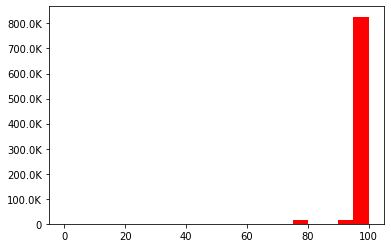

In [15]:
# histogram 
import pandas as pd
import pyspark.sql as sparksql
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt
#df.hist(column = 'smart_12_normalized')

from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist(ax, df.select('smart_12_normalized'), bins = 20, color=['red'])

In [6]:
dataset.smart_1_normalized.plot.density(color='green')
plt.title('smart_12_normalized')

TypeError: 'Column' object is not callable

In [16]:
#STEP-4 select columns based on 1. less missing value 2. VIF 4. Correlation
# 5. Outliers, skewness, kurtosis 6.EDA 7.Descriptive analysis ect... 
# columns_to_drop = ["smart_201_normalized","smart_17_raw","smart_245_raw","smart_201_raw","smart_218_raw","smart_16_raw","smart_170_raw","smart_180_normalized","smart_180_raw","model","serial_number","process_date","date","smart_226_raw","smart_8_normalized","smart_254_normalized","smart_12_raw","smart_192_raw","smart_196_normalized","smart_222_normalized","smart_175_raw","smart_190_normalized","smart_13_raw","smart_177_normalized","smart_190_raw","smart_202_raw","smart_255_raw", "smart_15_normalized", "smart_234_raw", "smart_255_normalized", "smart_15_raw", "smart_234_normalized", "smart_206_normalized", "smart_206_raw", "smart_248_raw", "smart_248_normalized","smart_210_raw", "smart_224_raw", "smart_18_raw", "smart_23_raw", "smart_24_raw", "smart_179_raw", "smart_181_raw", "smart_182_raw", "smart_251_normalized", "smart_250_normalized", "smart_254_raw"]

df = df.select("capacity_bytes",
"failure",
"smart_1_normalized",
"smart_1_raw",
"smart_2_normalized",
"smart_2_raw",
"smart_3_normalized",
"smart_3_raw",
"smart_4_normalized",
"smart_4_raw",
"smart_5_normalized",
"smart_5_raw",
"smart_7_normalized",
"smart_7_raw",
"smart_8_raw",
"smart_9_normalized",
"smart_9_raw",
"smart_10_normalized",
"smart_10_raw",
"smart_11_normalized",
"smart_11_raw",
"smart_12_normalized",
"smart_13_normalized",
"smart_16_normalized",
"smart_17_normalized",
"smart_18_normalized",
"smart_22_normalized",
"smart_22_raw",
"smart_23_normalized",
"smart_24_normalized",
"smart_168_normalized",
"smart_168_raw",
"smart_170_normalized",
"smart_173_normalized",
"smart_173_raw",
"smart_174_normalized",
"smart_174_raw",
"smart_175_normalized",
"smart_177_raw",
"smart_179_normalized",
"smart_181_normalized",
"smart_182_normalized",
"smart_183_normalized",
"smart_183_raw",
"smart_184_normalized",
"smart_184_raw",
"smart_187_normalized",
"smart_187_raw",
"smart_188_normalized",
"smart_188_raw",
"smart_189_normalized",
"smart_189_raw",
"smart_191_normalized",
"smart_191_raw",
"smart_192_normalized",
"smart_193_normalized",
"smart_193_raw",
"smart_194_normalized",
"smart_194_raw",
"smart_195_normalized",
"smart_195_raw",
"smart_196_raw",
"smart_197_normalized",
"smart_197_raw",
"smart_198_normalized",
"smart_198_raw",
"smart_199_normalized",
"smart_199_raw",
"smart_200_normalized",
"smart_200_raw",
"smart_202_normalized",
"smart_210_normalized",
"smart_218_normalized",
"smart_220_normalized",
"smart_220_raw",
"smart_222_raw",
"smart_223_normalized",
"smart_223_raw",
"smart_224_normalized",
"smart_225_normalized",
"smart_225_raw",
"smart_226_normalized",
"smart_231_normalized",
"smart_231_raw",
"smart_232_normalized",
"smart_232_raw",
"smart_233_normalized",
"smart_233_raw",
"smart_235_normalized",
"smart_235_raw",
"smart_240_normalized",
"smart_240_raw",
"smart_241_normalized",
"smart_241_raw",
"smart_242_normalized",
"smart_242_raw",
"smart_245_normalized",
"smart_247_normalized",
"smart_247_raw",
"smart_250_raw",
"smart_251_raw",
"smart_252_normalized",
"smart_252_raw",
"smart_160_normalized",
"smart_160_raw",
"smart_161_normalized",
"smart_161_raw",
"smart_163_normalized",
"smart_163_raw",
"smart_164_normalized",
"smart_164_raw",
"smart_165_normalized",
"smart_165_raw",
"smart_166_normalized",
"smart_166_raw",
"smart_167_normalized",
"smart_167_raw",
"smart_169_normalized",
"smart_169_raw",
"smart_176_normalized",
"smart_176_raw",
"smart_178_normalized",
"smart_178_raw")
cols = df.columns
#df.printSchema()

In [17]:
# scatter_matrix
pdf = df.toPandas()
from pandas.tools.plotting import scatter_matrix
stuff = scatter_matrix(pdf, alpha=0.7, figsize=(6, 6), diagonal='kde', color=pdf.col)

Py4JJavaError: An error occurred while calling o1531.collectToPython.
: java.lang.OutOfMemoryError: Java heap space
	at org.apache.spark.sql.execution.SparkPlan$$anon$1.next(SparkPlan.scala:373)
	at org.apache.spark.sql.execution.SparkPlan$$anon$1.next(SparkPlan.scala:369)
	at scala.collection.Iterator.foreach(Iterator.scala:941)
	at scala.collection.Iterator.foreach$(Iterator.scala:941)
	at org.apache.spark.sql.execution.SparkPlan$$anon$1.foreach(SparkPlan.scala:369)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeCollect$1(SparkPlan.scala:391)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeCollect$1$adapted(SparkPlan.scala:390)
	at org.apache.spark.sql.execution.SparkPlan$$Lambda$3045/1766481824.apply(Unknown Source)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofRef.foreach(ArrayOps.scala:198)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:390)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:3519)
	at org.apache.spark.sql.Dataset$$Lambda$1676/620990444.apply(Unknown Source)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3687)
	at org.apache.spark.sql.Dataset$$Lambda$1677/623478786.apply(Unknown Source)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$$$Lambda$1685/167639019.apply(Unknown Source)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.execution.SQLExecution$$$Lambda$1678/2073088127.apply(Unknown Source)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3685)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3516)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)


In [19]:
# OneHotEncoder  OneHotEncoderEstimator, 
from pyspark.ml.feature import OneHotEncoder,StringIndexer, VectorAssembler
# OneHotEncoder  OneHotEncoderEstimator, 
categoricalColumns = ['model']
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
#label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
#stages += [label_stringIdx]
numericCols = ["capacity_bytes",
"failure",
"smart_1_normalized",
"smart_1_raw",
"smart_2_normalized",
"smart_2_raw",
"smart_3_normalized",
"smart_3_raw",
"smart_4_normalized",
"smart_4_raw",
"smart_5_normalized",
"smart_5_raw",
"smart_7_normalized",
"smart_7_raw",
"smart_8_raw",
"smart_9_normalized",
"smart_9_raw",
"smart_10_normalized",
"smart_10_raw",
"smart_11_normalized",
"smart_11_raw",
"smart_12_normalized",
"smart_13_normalized",
"smart_16_normalized",
"smart_17_normalized",
"smart_18_normalized",
"smart_22_normalized",
"smart_22_raw",
"smart_23_normalized",
"smart_24_normalized",
"smart_168_normalized",
"smart_168_raw",
"smart_170_normalized",
"smart_173_normalized",
"smart_173_raw",
"smart_174_normalized",
"smart_174_raw",
"smart_175_normalized",
"smart_177_raw",
"smart_179_normalized",
"smart_181_normalized",
"smart_182_normalized",
"smart_183_normalized",
"smart_183_raw",
"smart_184_normalized",
"smart_184_raw",
"smart_187_normalized",
"smart_187_raw",
"smart_188_normalized",
"smart_188_raw",
"smart_189_normalized",
"smart_189_raw",
"smart_191_normalized",
"smart_191_raw",
"smart_192_normalized",
"smart_193_normalized",
"smart_193_raw",
"smart_194_normalized",
"smart_194_raw",
"smart_195_normalized",
"smart_195_raw",
"smart_196_raw",
"smart_197_normalized",
"smart_197_raw",
"smart_198_normalized",
"smart_198_raw",
"smart_199_normalized",
"smart_199_raw",
"smart_200_normalized",
"smart_200_raw",
"smart_202_normalized",
"smart_210_normalized",
"smart_218_normalized",
"smart_220_normalized",
"smart_220_raw",
"smart_222_raw",
"smart_223_normalized",
"smart_223_raw",
"smart_224_normalized",
"smart_225_normalized",
"smart_225_raw",
"smart_226_normalized",
"smart_231_normalized",
"smart_231_raw",
"smart_232_normalized",
"smart_232_raw",
"smart_233_normalized",
"smart_233_raw",
"smart_235_normalized",
"smart_235_raw",
"smart_240_normalized",
"smart_240_raw",
"smart_241_normalized",
"smart_241_raw",
"smart_242_normalized",
"smart_242_raw",
"smart_245_normalized",
"smart_247_normalized",
"smart_247_raw",
"smart_250_raw",
"smart_251_raw",
"smart_252_normalized",
"smart_252_raw",
"smart_160_normalized",
"smart_160_raw",
"smart_161_normalized",
"smart_161_raw",
"smart_163_normalized",
"smart_163_raw",
"smart_164_normalized",
"smart_164_raw",
"smart_165_normalized",
"smart_165_raw",
"smart_166_normalized",
"smart_166_raw",
"smart_167_normalized",
"smart_167_raw",
"smart_169_normalized",
"smart_169_raw",
"smart_176_normalized",
"smart_176_raw",
"smart_178_normalized",
"smart_178_raw"]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [23]:
# Correlation matrix
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df.columns, outputCol=vector_col)
df_vector = assembler.transform(df).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)

/home/smicro/.local/lib/python3.6/site-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [40]:
matrix = Correlation.corr(df_vector, vector_col)
cor_np = matrix.collect()[0][matrix.columns[0]].toArray()

In [38]:
def correlation_matrix(df, corr_columns, method='pearson'):
    vector_col = "corr_features"
    assembler = VectorAssembler(inputCols=corr_columns, outputCol=vector_col)
    df_vector = assembler.transform(df).select(vector_col)
    matrix = Correlation.corr(df_vector, vector_col, method)
    result = matrix.collect()[0]["pearson({})".format(vector_col)].values
    return pd.DataFrame(result.reshape(-1, len(corr_columns)), columns=corr_columns, index=corr_columns)

In [43]:
#describe
describe=df.describe()
#missings
import numpy as np
import pandas as pd
from openpyxl import Workbook
writer = pd.ExcelWriter("describe_pyspark.xlsx")
describe.to_excel(excel_writer=writer, sheet_name='Sheet1', na_rep="")
writer.save()

AttributeError: 'DataFrame' object has no attribute 'to_excel'

In [20]:
# scalling
#print("Before Scaling :")
#dataset.show(5)

from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# UDF for converting column type from vector to double type
unlist = udf(lambda x: round(float(list(x)[0]),3), DoubleType())

# Iterating over columns to be scaled
for i in ["capacity_bytes",
"smart_1_normalized",
"smart_1_raw",
"smart_2_normalized",
"smart_2_raw",
"smart_3_normalized",
"smart_3_raw",
"smart_4_normalized",
"smart_4_raw",
"smart_5_normalized",
"smart_5_raw",
"smart_7_normalized",
"smart_7_raw",
"smart_8_raw",
"smart_9_normalized",
"smart_9_raw",
"smart_10_normalized",
"smart_10_raw",
"smart_11_normalized",
"smart_11_raw",
"smart_12_normalized",
"smart_13_normalized",
"smart_16_normalized",
"smart_17_normalized",
"smart_18_normalized",
"smart_22_normalized",
"smart_22_raw",
"smart_23_normalized",
"smart_24_normalized",
"smart_168_normalized",
"smart_168_raw",
"smart_170_normalized",
"smart_173_normalized",
"smart_173_raw",
"smart_174_normalized",
"smart_174_raw",
"smart_175_normalized",
"smart_177_raw",
"smart_179_normalized",
"smart_181_normalized",
"smart_182_normalized",
"smart_183_normalized",
"smart_183_raw",
"smart_184_normalized",
"smart_184_raw",
"smart_187_normalized",
"smart_187_raw",
"smart_188_normalized",
"smart_188_raw",
"smart_189_normalized",
"smart_189_raw",
"smart_191_normalized",
"smart_191_raw",
"smart_192_normalized",
"smart_193_normalized",
"smart_193_raw",
"smart_194_normalized",
"smart_194_raw",
"smart_195_normalized",
"smart_195_raw",
"smart_196_raw",
"smart_197_normalized",
"smart_197_raw",
"smart_198_normalized",
"smart_198_raw",
"smart_199_normalized",
"smart_199_raw",
"smart_200_normalized",
"smart_200_raw",
"smart_202_normalized",
"smart_210_normalized",
"smart_218_normalized",
"smart_220_normalized",
"smart_220_raw",
"smart_222_raw",
"smart_223_normalized",
"smart_223_raw",
"smart_224_normalized",
"smart_225_normalized",
"smart_225_raw",
"smart_226_normalized",
"smart_231_normalized",
"smart_231_raw",
"smart_232_normalized",
"smart_232_raw",
"smart_233_normalized",
"smart_233_raw",
"smart_235_normalized",
"smart_235_raw",
"smart_240_normalized",
"smart_240_raw",
"smart_241_normalized",
"smart_241_raw",
"smart_242_normalized",
"smart_242_raw",
"smart_245_normalized",
"smart_247_normalized",
"smart_247_raw",
"smart_250_raw",
"smart_251_raw",
"smart_252_normalized",
"smart_252_raw",
"smart_160_normalized",
"smart_160_raw",
"smart_161_normalized",
"smart_161_raw",
"smart_163_normalized",
"smart_163_raw",
"smart_164_normalized",
"smart_164_raw",
"smart_165_normalized",
"smart_165_raw",
"smart_166_normalized",
"smart_166_raw",
"smart_167_normalized",
"smart_167_raw",
"smart_169_normalized",
"smart_169_raw",
"smart_176_normalized",
"smart_176_raw",
"smart_178_normalized",
"smart_178_raw"]:
    # VectorAssembler Transformation - Converting column to vector type
    assembler = VectorAssembler(inputCols=[i],outputCol=i+"_Vect")

    # MinMaxScaler Transformation
    scaler = MinMaxScaler(inputCol=i+"_Vect", outputCol=i+"_Scaled")

    # Pipeline of VectorAssembler and MinMaxScaler
    pipeline = Pipeline(stages=[assembler, scaler])

    # Fitting pipeline on dataframe
    dataset = pipeline.fit(dataset).transform(dataset).withColumn(i+"_Scaled", unlist(i+"_Scaled")).drop(i+"_Vect")

#print("After Scaling :")
#dataset.show(5)

Py4JJavaError: An error occurred while calling o1542.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 73 in stage 5.0 failed 1 times, most recent failure: Lost task 73.0 in stage 5.0 (TID 374) (sm1.dev.com executor driver): org.apache.spark.SparkException: Failed to execute user defined function(VectorAssembler$$Lambda$3325/1254586831: (struct<capacity_bytes_double_VectorAssembler_0549c0629cef:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage3.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$2(ObjectHashAggregateExec.scala:87)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$2$adapted(ObjectHashAggregateExec.scala:85)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2(RDD.scala:885)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2$adapted(RDD.scala:885)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: Encountered null while assembling a row with handleInvalid = "error". Consider
removing nulls from dataset or using handleInvalid = "keep" or "skip".
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1(VectorAssembler.scala:291)
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1$adapted(VectorAssembler.scala:260)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:38)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:260)
	at org.apache.spark.ml.feature.VectorAssembler.$anonfun$transform$6(VectorAssembler.scala:143)
	... 23 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2258)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2206)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2445)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2387)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2376)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2196)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2217)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2261)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:390)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3696)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3687)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3685)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2729)
	at org.apache.spark.sql.Dataset.first(Dataset.scala:2736)
	at org.apache.spark.ml.feature.MinMaxScaler.fit(MinMaxScaler.scala:120)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: Failed to execute user defined function(VectorAssembler$$Lambda$3325/1254586831: (struct<capacity_bytes_double_VectorAssembler_0549c0629cef:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage3.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$2(ObjectHashAggregateExec.scala:87)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$2$adapted(ObjectHashAggregateExec.scala:85)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2(RDD.scala:885)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2$adapted(RDD.scala:885)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: org.apache.spark.SparkException: Encountered null while assembling a row with handleInvalid = "error". Consider
removing nulls from dataset or using handleInvalid = "keep" or "skip".
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1(VectorAssembler.scala:291)
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1$adapted(VectorAssembler.scala:260)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:38)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:260)
	at org.apache.spark.ml.feature.VectorAssembler.$anonfun$transform$6(VectorAssembler.scala:143)
	... 23 more


In [ ]:
# drop after scalling 
columns_to_drop = ["capacity_bytes",
"smart_1_normalized",
"smart_1_raw",
"smart_2_normalized",
"smart_2_raw",
"smart_3_normalized",
"smart_3_raw",
"smart_4_normalized",
"smart_4_raw",
"smart_5_normalized",
"smart_5_raw",
"smart_7_normalized",
"smart_7_raw",
"smart_8_raw",
"smart_9_normalized",
"smart_9_raw",
"smart_10_normalized",
"smart_10_raw",
"smart_11_normalized",
"smart_11_raw",
"smart_12_normalized",
"smart_13_normalized",
"smart_16_normalized",
"smart_17_normalized",
"smart_18_normalized",
"smart_22_normalized",
"smart_22_raw",
"smart_23_normalized",
"smart_24_normalized",
"smart_168_normalized",
"smart_168_raw",
"smart_170_normalized",
"smart_173_normalized",
"smart_173_raw",
"smart_174_normalized",
"smart_174_raw",
"smart_175_normalized",
"smart_177_raw",
"smart_179_normalized",
"smart_181_normalized",
"smart_182_normalized",
"smart_183_normalized",
"smart_183_raw",
"smart_184_normalized",
"smart_184_raw",
"smart_187_normalized",
"smart_187_raw",
"smart_188_normalized",
"smart_188_raw",
"smart_189_normalized",
"smart_189_raw",
"smart_191_normalized",
"smart_191_raw",
"smart_192_normalized",
"smart_193_normalized",
"smart_193_raw",
"smart_194_normalized",
"smart_194_raw",
"smart_195_normalized",
"smart_195_raw",
"smart_196_raw",
"smart_197_normalized",
"smart_197_raw",
"smart_198_normalized",
"smart_198_raw",
"smart_199_normalized",
"smart_199_raw",
"smart_200_normalized",
"smart_200_raw",
"smart_202_normalized",
"smart_210_normalized",
"smart_218_normalized",
"smart_220_normalized",
"smart_220_raw",
"smart_222_raw",
"smart_223_normalized",
"smart_223_raw",
"smart_224_normalized",
"smart_225_normalized",
"smart_225_raw",
"smart_226_normalized",
"smart_231_normalized",
"smart_231_raw",
"smart_232_normalized",
"smart_232_raw",
"smart_233_normalized",
"smart_233_raw",
"smart_235_normalized",
"smart_235_raw",
"smart_240_normalized",
"smart_240_raw",
"smart_241_normalized",
"smart_241_raw",
"smart_242_normalized",
"smart_242_raw",
"smart_245_normalized",
"smart_247_normalized",
"smart_247_raw",
"smart_250_raw",
"smart_251_raw",
"smart_252_normalized",
"smart_252_raw",
"smart_160_normalized",
"smart_160_raw",
"smart_161_normalized",
"smart_161_raw",
"smart_163_normalized",
"smart_163_raw",
"smart_164_normalized",
"smart_164_raw",
"smart_165_normalized",
"smart_165_raw",
"smart_166_normalized",
"smart_166_raw",
"smart_167_normalized",
"smart_167_raw",
"smart_169_normalized",
"smart_169_raw",
"smart_176_normalized",
"smart_176_raw",
"smart_178_normalized",
"smart_178_raw"]
dataset = dataset.drop(*columns_to_drop)

In [ ]:
#dataset.printSchema()
df.dtypes

In [ ]:
#1 count missing value# import sql function pyspark
import pyspark.sql.functions as f

# null values in each column
data_agg = dataset.agg(*[f.count(f.when(f.isnull(c), c)).alias(c) for c in dataset.columns])
data_agg.show()

In [46]:
import numpy as np
import pandas as pd
from openpyxl import Workbook
writer = pd.ExcelWriter("describe_pyspark.xlsx")
describe.to_excel(excel_writer=writer, sheet_name='Sheet1', na_rep="")
writer.save()

AttributeError: 'NoneType' object has no attribute 'to_excel'

In [ ]:
df.select('model').describe().show()


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [48]:
X = df.iloc[:,:-1]
calc_vif(X)

AttributeError: 'DataFrame' object has no attribute 'iloc'